In [1]:
import gensim
import pandas as pd
import os

# Setup

This has been already cleaned in Twitter Labeling file

In [2]:
df = pd.read_csv('data/word2Vec.csv', index_col=[0])

In [3]:
df

,id,text
0,1413639045268217856,@KegsnEggs Wheres league of legends?
1,1414479504945270784,Watched the #LCS games with @CaptainFlowers to...
2,1412812522873233413,Wait why the new league of legends character s...
3,1414155902718988289,Starcraft I and II (2 games?)\nWarcraft III\nC...
4,1412275542280257536,Just called a sweaty neckbeard in league of le...
...,...,...
324829,1500316004370558979,Miss Fortune Highlights\n#LoL #wildrift #missf...
324830,1503948740775882753,eres muy joven \nMISS FORTUNE ES LA COMEDY QU...
324831,1504077934646157323,@hammyinmiami Im still looking for someone to...
324832,1507454234249158657,After spending more than 30 mins on hold waiti...


In [4]:
df.shape

(324824, 2)

# Preprocessing

In [5]:
first_comment = df.text[0]

In [6]:
gensim.utils.simple_preprocess(first_comment)

['kegsneggs', 'wheres', 'league', 'of', 'legends']

In [7]:
text_1 = df.text.apply(gensim.utils.simple_preprocess)

In [8]:
text_1

0                  [kegsneggs, wheres, league, of, legends]
1         [watched, the, lcs, games, with, captainflower...
2         [wait, why, the, new, league, of, legends, cha...
3         [starcraft, and, ii, games, warcraft, iii, cs,...
4         [just, called, sweaty, neckbeard, in, league, ...
                                ...                        
324829    [miss, fortune, highlights, lol, wildrift, mis...
324830    [eres, muy, joven, miss, fortune, es, la, come...
324831    [hammyinmiami, still, looking, for, someone, t...
324832    [after, spending, more, than, mins, on, hold, ...
324833    [wasendemocrats, govinslee, since, roughly, of...
Name: text, Length: 324824, dtype: object

## Building the Word2Vec Model

In [9]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=2,
    workers=4
)

In [10]:
model.build_vocab(text_1, progress_per=1000)

In [11]:
model.epochs

5

In [12]:
model.corpus_count

324824

In [13]:
model.train(text_1, total_examples=model.corpus_count, epochs=model.epochs)

(27998931, 35037095)

In [14]:
model.save("./word2vec-minibatch-1.model")

Some examples of how the model featurized

In [15]:
model.wv.most_similar("good")

[('bad', 0.74284428358078),
 ('nice', 0.6426088809967041),
 ('great', 0.6002240180969238),
 ('solid', 0.56125408411026),
 ('decent', 0.5552210807800293),
 ('tough', 0.5442237257957458),
 ('big', 0.5399317741394043),
 ('perfect', 0.5386345982551575),
 ('hard', 0.5375456213951111),
 ('cool', 0.5362781882286072)]

In [16]:
model.wv.similarity(w1="ahri", w2="good")

-0.029038727

In [17]:
model.wv.similarity(w1="great", w2="good")

0.600224

In [18]:
model.wv.similarity(w1="terrible", w2="awesome")

0.2161384

In [19]:
model.wv.similarity(w1="badass", w2="jinx")

-0.039012413

In [20]:
model.wv.similarity(w1="badass", w2="teemo")

0.2915474

Casting the data to two dimensions for visualization purposes using t-SNE.

In [21]:
vocab = list(model.wv.key_to_index)
X = model.wv[vocab]

In [22]:
from sklearn.manifold import TSNE

In [23]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [24]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x','y'])

In [25]:
df.loc['the']

x    -9.489840
y   -14.312733
Name: the, dtype: float32

In [26]:
df.iloc[0]

x    -9.489840
y   -14.312733
Name: the, dtype: float32

In [27]:
df

,x,y
the,-9.489840,-14.312733
co,-20.403469,-25.650131
https,-15.688904,-18.320686
to,-9.423092,-14.415783
and,-9.426958,-14.401794
...,...,...
combest,-2.288065,18.340771
loony,18.712713,-2.324171
highimkat_,24.329321,-2.199702
observador,14.128035,9.094001


In [28]:
import matplotlib.pyplot as plt

In [29]:
for i in model.wv.most_similar("good"):
    print(i[0], "\t", [df.loc[i[0]]["x"], df.loc[i[0]]["y"]])

bad 	 [-8.084166, -12.918226]
nice 	 [-8.131414, -13.405798]
great 	 [-13.908269, -14.668132]
solid 	 [-9.9016285, -14.037488]
decent 	 [-9.535183, -13.705651]
tough 	 [-8.696651, -13.513573]
big 	 [-10.170529, -14.063974]
perfect 	 [-13.84029, -14.300993]
hard 	 [-8.356261, -12.809584]
cool 	 [-8.100332, -13.434047]


## Plotting

In [30]:
# BAD
words_similar_to_bad = model.wv.most_similar("bad")

bad_list = list()

for i in words_similar_to_bad:
    bad_list.append(i[0])

# GOOD
words_similar_to_good = model.wv.most_similar("good")

good_list = list()

for i in words_similar_to_good:
    good_list.append(i[0])
    
# BADASS
words_similar_to_badass = model.wv.most_similar("badass")

badass_list = list()

for i in words_similar_to_badass:
    badass_list.append(i[0])
    
# DIFFICULT
words_similar_to_difficult = model.wv.most_similar("difficult")

difficult_list = list()

for i in words_similar_to_difficult:
    difficult_list.append(i[0])
    
# THE
words_similar_to_the = model.wv.most_similar("the")

the_list = list()

for i in words_similar_to_the:
    the_list.append(i[0])
    
# WORSHIPPED
words_similar_to_worshipped = model.wv.most_similar("worshipped")

worshipped_list = list()

for i in words_similar_to_worshipped:
    worshipped_list.append(i[0])

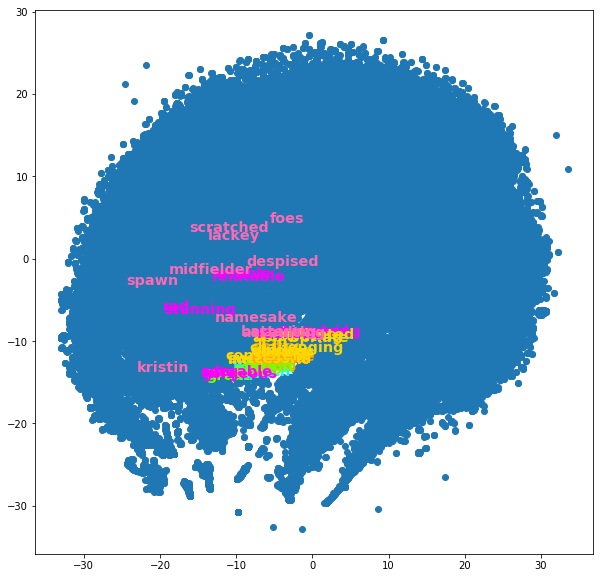

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
#ax = fig.add_subplot(1,1,1)

ax.scatter(df['x'], df['y'])

def plot_annotate(w,p,c):
    ax.annotate(w, p, color = c, fontweight='bold', fontsize='x-large')

for word, pos in df.iterrows():
    if word in bad_list:
        plot_annotate(word,pos,'orange')
    if word in good_list:
        plot_annotate(word,pos,'lawngreen')
    if word in badass_list:
        plot_annotate(word,pos,'magenta')
    if word in difficult_list:
        plot_annotate(word,pos,'gold')
    if word in the_list:
        plot_annotate(word, pos, 'cyan')
    if word in worshipped_list:
        plot_annotate(word, pos, 'hotpink')


In [32]:
plt.savefig('./window_10.png')

<Figure size 432x288 with 0 Axes>

## Creating a new model

In [33]:
model_2 = gensim.models.Word2Vec(
    window=5,
    min_count=2,
    workers=4
)

model_2.build_vocab(text_1, progress_per=1000)

model_2.train(text_1, total_examples=model_2.corpus_count, epochs=model_2.epochs)

model_2.save("./word2vec-minibatch-1-model-2.model")

vocab_2 = list(model_2.wv.key_to_index)
X_2 = model_2.wv[vocab_2]

tsne_2 = TSNE(n_components=2)
X_tsne_2 = tsne_2.fit_transform(X_2)

df_2 = pd.DataFrame(X_tsne_2, index=vocab_2, columns=['x','y'])

In [34]:
# BAD
words_similar_to_bad = model_2.wv.most_similar("bad")

bad_list = list()

for i in words_similar_to_bad:
    bad_list.append(i[0])

# GOOD
words_similar_to_good = model_2.wv.most_similar("good")

good_list = list()

for i in words_similar_to_good:
    good_list.append(i[0])
    
# BADASS
words_similar_to_badass = model_2.wv.most_similar("badass")

badass_list = list()

for i in words_similar_to_badass:
    badass_list.append(i[0])
    
# DIFFICULT
words_similar_to_difficult = model_2.wv.most_similar("difficult")

difficult_list = list()

for i in words_similar_to_difficult:
    difficult_list.append(i[0])
    
# THE
words_similar_to_the = model_2.wv.most_similar("the")

the_list = list()

for i in words_similar_to_the:
    the_list.append(i[0])
    
# WORSHIPPED
words_similar_to_worshipped = model_2.wv.most_similar("worshipped")

worshipped_list = list()

for i in words_similar_to_worshipped:
    worshipped_list.append(i[0])

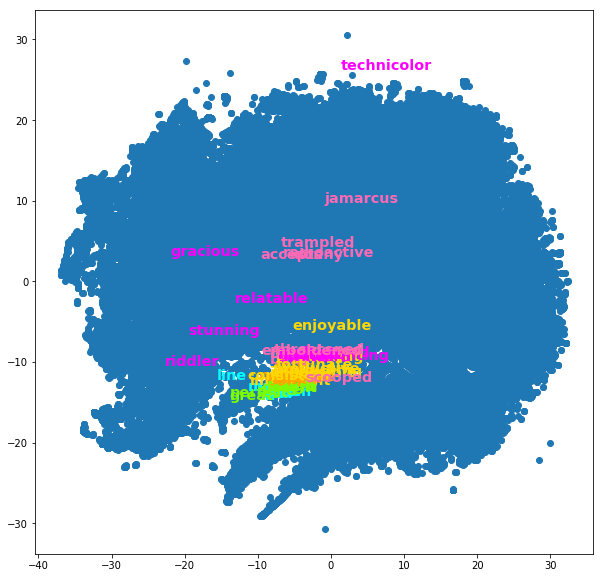

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
#ax = fig.add_subplot(1,1,1)

ax.scatter(df_2['x'], df_2['y'])

def plot_annotate(w,p,c):
    ax.annotate(w, p, color = c, fontweight='bold', fontsize='x-large')

for word, pos in df.iterrows():
    if word in bad_list:
        plot_annotate(word,pos,'orange')
    if word in good_list:
        plot_annotate(word,pos,'lawngreen')
    if word in badass_list:
        plot_annotate(word,pos,'magenta')
    if word in difficult_list:
        plot_annotate(word,pos,'gold')
    if word in the_list:
        plot_annotate(word, pos, 'cyan')
    if word in worshipped_list:
        plot_annotate(word, pos, 'hotpink')


In [36]:
plt.savefig('./window_5.png')

<Figure size 432x288 with 0 Axes>

In [37]:
model_3 = gensim.models.Word2Vec(
    window=4,
    min_count=2,
    workers=4
)

model_3.build_vocab(text_1, progress_per=1000)

model_3.train(text_1, 
              total_examples=model_3.corpus_count, 
              epochs=model_3.epochs)

model_3.save("./word2vec-minibatch-1-model-3.model")

vocab_3 = list(model_3.wv.key_to_index)
X_3 = model_3.wv[vocab_3]

tsne_3 = TSNE(n_components=2)
X_tsne_3 = tsne_3.fit_transform(X_3)

df_3 = pd.DataFrame(X_tsne_3, index=vocab_3, columns=['x','y'])

In [38]:
# BAD
words_similar_to_bad = model_3.wv.most_similar("bad")

bad_list = list()

for i in words_similar_to_bad:
    bad_list.append(i[0])

# GOOD
words_similar_to_good = model_3.wv.most_similar("good")

good_list = list()

for i in words_similar_to_good:
    good_list.append(i[0])
    
# BADASS
words_similar_to_badass = model_3.wv.most_similar("badass")

badass_list = list()

for i in words_similar_to_badass:
    badass_list.append(i[0])
    
# DIFFICULT
words_similar_to_difficult = model_2.wv.most_similar("difficult")

difficult_list = list()

for i in words_similar_to_difficult:
    difficult_list.append(i[0])
    
# THE
words_similar_to_the = model_3.wv.most_similar("the")

the_list = list()

for i in words_similar_to_the:
    the_list.append(i[0])
    
# WORSHIPPED
words_similar_to_worshipped = model_3.wv.most_similar("worshipped")

worshipped_list = list()

for i in words_similar_to_worshipped:
    worshipped_list.append(i[0])

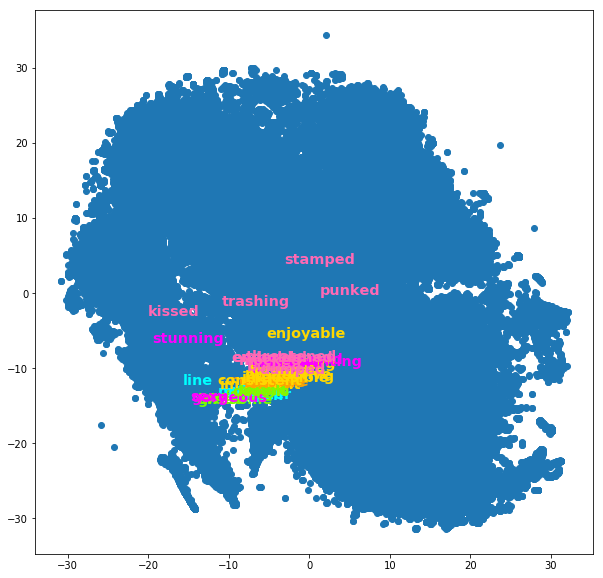

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
#ax = fig.add_subplot(1,1,1)

ax.scatter(df_3['x'], df_3['y'])

def plot_annotate(w,p,c):
    ax.annotate(w, p, color = c, fontweight='bold', fontsize='x-large')

for word, pos in df.iterrows():
    if word in bad_list:
        plot_annotate(word,pos,'orange')
    if word in good_list:
        plot_annotate(word,pos,'lawngreen')
    if word in badass_list:
        plot_annotate(word,pos,'magenta')
    if word in difficult_list:
        plot_annotate(word,pos,'gold')
    if word in the_list:
        plot_annotate(word, pos, 'cyan')
    if word in worshipped_list:
        plot_annotate(word, pos, 'hotpink')


In [40]:
plt.savefig('./window_4.png')

<Figure size 432x288 with 0 Axes>

### Text preprocessing

In [42]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline

In [45]:
word2Vec = pd.read_csv('data/word2Vec.csv', index_col=[0])
word2Vec

,id,text
0,1413639045268217856,@KegsnEggs Wheres league of legends?
1,1414479504945270784,Watched the #LCS games with @CaptainFlowers to...
2,1412812522873233413,Wait why the new league of legends character s...
3,1414155902718988289,Starcraft I and II (2 games?)\nWarcraft III\nC...
4,1412275542280257536,Just called a sweaty neckbeard in league of le...
...,...,...
324829,1500316004370558979,Miss Fortune Highlights\n#LoL #wildrift #missf...
324830,1503948740775882753,eres muy joven \nMISS FORTUNE ES LA COMEDY QU...
324831,1504077934646157323,@hammyinmiami Im still looking for someone to...
324832,1507454234249158657,After spending more than 30 mins on hold waiti...


In [46]:
preprocessed_comments = word2Vec.text.apply(gensim.utils.simple_preprocess)

In [47]:
preprocessed_comments[:5]

0             [kegsneggs, wheres, league, of, legends]
1    [watched, the, lcs, games, with, captainflower...
2    [wait, why, the, new, league, of, legends, cha...
3    [starcraft, and, ii, games, warcraft, iii, cs,...
4    [just, called, sweaty, neckbeard, in, league, ...
Name: text, dtype: object

### Multiple Model Building

In [48]:
windows = [i for i in range(5,11)] # 5,6,7,8,9,10

In [49]:
min_counts = [i for i in range(2,5)] # 2,3,4

In [50]:
epochs = [i for i in range(5,16,5)] # 5,10,15

In [56]:
def model_w_m_e(win, min_cnt, ep, text):
    model = gensim.models.Word2Vec(
        window=win,
        min_count=min_cnt,
        workers=os.cpu_count()
    )
    
    model.build_vocab(text)
    
    model.train(text, total_examples=model.corpus_count, epochs=ep)
    
    model.save(f"./word2vec_{win}-window_{min_cnt}-min_{ep}-epochs.model")
    
    return model

In [57]:
model_matrix = [
    [
        [[],[],[]],
        [[],[],[]],
        [[],[],[]]
    ],
    [
        [[],[],[]],
        [[],[],[]],
        [[],[],[]]
    ],
    [
        [[],[],[]],
        [[],[],[]],
        [[],[],[]]
    ],
    [
        [[],[],[]],
        [[],[],[]],
        [[],[],[]]
    ],
    [
        [[],[],[]],
        [[],[],[]],
        [[],[],[]]
    ],
    [
        [[],[],[]],
        [[],[],[]],
        [[],[],[]]
    ]
]

In [58]:
from tqdm import tqdm

In [59]:
for w in tqdm(windows):
    for m in tqdm(min_counts):
        for e in tqdm(epochs):
            print(f"window size {w}, min count {m}, number epochs {e}")
            
            model = model_w_m_e(w, m, e, preprocessed_comments)
            
            model_matrix[w-5][m-2][int((e/5)-1)] = model







  0%|          | 0/6 [00:00<?, ?it/s]






  0%|          | 0/3 [00:00<?, ?it/s]







  0%|          | 0/3 [00:00<?, ?it/s]

window size 5, min count 2, number epochs 5










 33%|███▎      | 1/3 [00:54<01:49, 54.97s/it]

window size 5, min count 2, number epochs 10










 67%|██████▋   | 2/3 [02:32<01:07, 67.64s/it]

window size 5, min count 2, number epochs 15










100%|██████████| 3/3 [04:51<00:00, 89.28s/it]






 33%|███▎      | 1/3 [04:51<09:43, 291.98s/it]







  0%|          | 0/3 [00:00<?, ?it/s]

window size 5, min count 3, number epochs 5










 33%|███▎      | 1/3 [00:52<01:44, 52.02s/it]

window size 5, min count 3, number epochs 10










 67%|██████▋   | 2/3 [02:24<01:04, 64.24s/it]

window size 5, min count 3, number epochs 15










100%|██████████| 3/3 [04:40<00:00, 85.75s/it]






 67%|██████▋   | 2/3 [09:32<04:48, 288.60s/it]







  0%|          | 0/3 [00:00<?, ?it/s]

window size 5, min count 4, number epochs 5










 33%|███▎      | 1/3 [00:48<01:37, 48.59s/it]

window size 5, min count 4, number epochs 10










 67%|██████▋   | 2/3 [02:19<01:01, 61.37s/it]

window size 5, min count 4, number epochs 15










100%|██████████| 3/3 [04:33<00:00, 82.99s/it]






100%|██████████| 3/3 [14:05<00:00, 283.99s/it]





 17%|█▋        | 1/6 [14:05<1:10:29, 845.94s/it]






  0%|          | 0/3 [00:00<?, ?it/s]







  0%|          | 0/3 [00:00<?, ?it/s]

window size 6, min count 2, number epochs 5










 33%|███▎      | 1/3 [00:54<01:48, 54.13s/it]

window size 6, min count 2, number epochs 10










 67%|██████▋   | 2/3 [02:31<01:06, 66.97s/it]

window size 6, min count 2, number epochs 15










100%|██████████| 3/3 [04:50<00:00, 88.60s/it]






 33%|███▎      | 1/3 [04:50<09:40, 290.14s/it]







  0%|          | 0/3 [00:00<?, ?it/s]

window size 6, min count 3, number epochs 5










 33%|███▎      | 1/3 [00:50<01:40, 50.09s/it]

window size 6, min count 3, number epochs 10










 67%|██████▋   | 2/3 [02:23<01:03, 63.23s/it]

window size 6, min count 3, number epochs 15










100%|██████████| 3/3 [04:39<00:00, 84.81s/it]






 67%|██████▋   | 2/3 [09:29<04:46, 286.85s/it]







  0%|          | 0/3 [00:00<?, ?it/s]

window size 6, min count 4, number epochs 5










 33%|███▎      | 1/3 [00:48<01:36, 48.47s/it]

window size 6, min count 4, number epochs 10










 67%|██████▋   | 2/3 [02:18<01:01, 61.08s/it]

window size 6, min count 4, number epochs 15










100%|██████████| 3/3 [04:31<00:00, 82.42s/it]






100%|██████████| 3/3 [14:00<00:00, 282.15s/it]





 33%|███▎      | 2/6 [28:06<56:17, 844.32s/it]  






  0%|          | 0/3 [00:00<?, ?it/s]







  0%|          | 0/3 [00:00<?, ?it/s]

window size 7, min count 2, number epochs 5










 33%|███▎      | 1/3 [00:54<01:49, 54.54s/it]

window size 7, min count 2, number epochs 10










 67%|██████▋   | 2/3 [02:32<01:07, 67.64s/it]

window size 7, min count 2, number epochs 15










100%|██████████| 3/3 [04:53<00:00, 89.44s/it]






 33%|███▎      | 1/3 [04:53<09:46, 293.05s/it]







  0%|          | 0/3 [00:00<?, ?it/s]

window size 7, min count 3, number epochs 5










 33%|███▎      | 1/3 [00:51<01:42, 51.37s/it]

window size 7, min count 3, number epochs 10










 67%|██████▋   | 2/3 [02:24<01:03, 63.82s/it]

window size 7, min count 3, number epochs 15










100%|██████████| 3/3 [04:39<00:00, 85.22s/it]






 67%|██████▋   | 2/3 [09:32<04:48, 288.96s/it]







  0%|          | 0/3 [00:00<?, ?it/s]

window size 7, min count 4, number epochs 5










 33%|███▎      | 1/3 [00:48<01:37, 48.89s/it]

window size 7, min count 4, number epochs 10










 67%|██████▋   | 2/3 [02:18<01:01, 61.21s/it]

window size 7, min count 4, number epochs 15










100%|██████████| 3/3 [04:31<00:00, 82.51s/it]






100%|██████████| 3/3 [14:03<00:00, 283.59s/it]





 50%|█████     | 3/6 [42:10<42:12, 844.09s/it]






  0%|          | 0/3 [00:00<?, ?it/s]







  0%|          | 0/3 [00:00<?, ?it/s]

window size 8, min count 2, number epochs 5










 33%|███▎      | 1/3 [00:55<01:51, 55.92s/it]

window size 8, min count 2, number epochs 10










 67%|██████▋   | 2/3 [02:33<01:08, 68.52s/it]

window size 8, min count 2, number epochs 15










100%|██████████| 3/3 [04:54<00:00, 90.21s/it]






 33%|███▎      | 1/3 [04:54<09:49, 294.67s/it]







  0%|          | 0/3 [00:00<?, ?it/s]

window size 8, min count 3, number epochs 5










 33%|███▎      | 1/3 [00:51<01:43, 51.76s/it]

window size 8, min count 3, number epochs 10










 67%|██████▋   | 2/3 [02:25<01:04, 64.36s/it]

window size 8, min count 3, number epochs 15










100%|██████████| 3/3 [04:40<00:00, 85.44s/it]






 67%|██████▋   | 2/3 [09:34<04:50, 290.31s/it]







  0%|          | 0/3 [00:00<?, ?it/s]

window size 8, min count 4, number epochs 5










 33%|███▎      | 1/3 [00:49<01:38, 49.48s/it]

window size 8, min count 4, number epochs 10










 67%|██████▋   | 2/3 [02:20<01:01, 61.84s/it]

window size 8, min count 4, number epochs 15










100%|██████████| 3/3 [04:32<00:00, 83.07s/it]






100%|██████████| 3/3 [14:07<00:00, 285.06s/it]





 67%|██████▋   | 4/6 [56:17<28:10, 845.15s/it]






  0%|          | 0/3 [00:00<?, ?it/s]







  0%|          | 0/3 [00:00<?, ?it/s]

window size 9, min count 2, number epochs 5










 33%|███▎      | 1/3 [00:55<01:51, 55.80s/it]

window size 9, min count 2, number epochs 10










 67%|██████▋   | 2/3 [02:35<01:09, 69.11s/it]

window size 9, min count 2, number epochs 15










100%|██████████| 3/3 [04:58<00:00, 91.06s/it]






 33%|███▎      | 1/3 [04:58<09:56, 298.26s/it]







  0%|          | 0/3 [00:00<?, ?it/s]

window size 9, min count 3, number epochs 5










 33%|███▎      | 1/3 [00:51<01:42, 51.41s/it]

window size 9, min count 3, number epochs 10










 67%|██████▋   | 2/3 [02:25<01:04, 64.30s/it]

window size 9, min count 3, number epochs 15










100%|██████████| 3/3 [04:42<00:00, 86.16s/it]






 67%|██████▋   | 2/3 [09:41<04:53, 293.67s/it]







  0%|          | 0/3 [00:00<?, ?it/s]

window size 9, min count 4, number epochs 5










 33%|███▎      | 1/3 [00:49<01:38, 49.26s/it]

window size 9, min count 4, number epochs 10










 67%|██████▋   | 2/3 [02:19<01:01, 61.59s/it]

window size 9, min count 4, number epochs 15










100%|██████████| 3/3 [04:33<00:00, 83.26s/it]






100%|██████████| 3/3 [14:14<00:00, 287.60s/it]





 83%|████████▎ | 5/6 [1:10:32<14:08, 848.01s/it]






  0%|          | 0/3 [00:00<?, ?it/s]







  0%|          | 0/3 [00:00<?, ?it/s]

window size 10, min count 2, number epochs 5










 33%|███▎      | 1/3 [00:58<01:57, 58.80s/it]

window size 10, min count 2, number epochs 10










 67%|██████▋   | 2/3 [02:39<01:11, 71.33s/it]

window size 10, min count 2, number epochs 15










100%|██████████| 3/3 [05:02<00:00, 92.77s/it]






 33%|███▎      | 1/3 [05:02<10:04, 302.16s/it]







  0%|          | 0/3 [00:00<?, ?it/s]

window size 10, min count 3, number epochs 5










 33%|███▎      | 1/3 [00:51<01:43, 51.72s/it]

window size 10, min count 3, number epochs 10










 67%|██████▋   | 2/3 [02:26<01:04, 64.53s/it]

window size 10, min count 3, number epochs 15










100%|██████████| 3/3 [04:43<00:00, 86.27s/it]






 67%|██████▋   | 2/3 [09:45<04:56, 296.47s/it]







  0%|          | 0/3 [00:00<?, ?it/s]

window size 10, min count 4, number epochs 5










 33%|███▎      | 1/3 [00:49<01:39, 49.88s/it]

window size 10, min count 4, number epochs 10










 67%|██████▋   | 2/3 [02:21<01:02, 62.46s/it]

window size 10, min count 4, number epochs 15










100%|██████████| 3/3 [04:34<00:00, 83.49s/it]






100%|██████████| 3/3 [14:19<00:00, 289.81s/it]





100%|██████████| 6/6 [1:24:51<00:00, 851.49s/it]

In [60]:
for w in windows:
    for m in min_counts:
        for e in epochs:
            print(f"{w}:{w-5},{m}:{m-2},{e}:{int((e/5)-1)}")

5:0,2:0,5:0
5:0,2:0,10:1
5:0,2:0,15:2
5:0,3:1,5:0
5:0,3:1,10:1
5:0,3:1,15:2
5:0,4:2,5:0
5:0,4:2,10:1
5:0,4:2,15:2
6:1,2:0,5:0
6:1,2:0,10:1
6:1,2:0,15:2
6:1,3:1,5:0
6:1,3:1,10:1
6:1,3:1,15:2
6:1,4:2,5:0
6:1,4:2,10:1
6:1,4:2,15:2
7:2,2:0,5:0
7:2,2:0,10:1
7:2,2:0,15:2
7:2,3:1,5:0
7:2,3:1,10:1
7:2,3:1,15:2
7:2,4:2,5:0
7:2,4:2,10:1
7:2,4:2,15:2
8:3,2:0,5:0
8:3,2:0,10:1
8:3,2:0,15:2
8:3,3:1,5:0
8:3,3:1,10:1
8:3,3:1,15:2
8:3,4:2,5:0
8:3,4:2,10:1
8:3,4:2,15:2
9:4,2:0,5:0
9:4,2:0,10:1
9:4,2:0,15:2
9:4,3:1,5:0
9:4,3:1,10:1
9:4,3:1,15:2
9:4,4:2,5:0
9:4,4:2,10:1
9:4,4:2,15:2
10:5,2:0,5:0
10:5,2:0,10:1
10:5,2:0,15:2
10:5,3:1,5:0
10:5,3:1,10:1
10:5,3:1,15:2
10:5,4:2,5:0
10:5,4:2,10:1
10:5,4:2,15:2


In [61]:
for i in range(6):
    for j in range(3):
        for k in range(3):
            t = model_matrix[i][j][k]
            print(t.window, t.min_count, t.epochs)
            print("terrible X awesome", t.wv.similarity(w1="terrible", w2="awesome"))
            print("great X good", t.wv.similarity(w1="great",w2="good"))
            print()
                                  

5 2 5
terrible X awesome 0.33838776
great X good 0.67695445

5 2 10
terrible X awesome 0.33508897
great X good 0.6786532

5 2 15
terrible X awesome 0.36154455
great X good 0.698362

5 3 5
terrible X awesome 0.3081164
great X good 0.7046909

5 3 10
terrible X awesome 0.3211426
great X good 0.6731967

5 3 15
terrible X awesome 0.31328592
great X good 0.70129734

5 4 5
terrible X awesome 0.32997298
great X good 0.6531981

5 4 10
terrible X awesome 0.32005185
great X good 0.67919797

5 4 15
terrible X awesome 0.3406552
great X good 0.6789452

6 2 5
terrible X awesome 0.2763228
great X good 0.68231887

6 2 10
terrible X awesome 0.29148063
great X good 0.67137724

6 2 15
terrible X awesome 0.2989469
great X good 0.70917416

6 3 5
terrible X awesome 0.290257
great X good 0.65678656

6 3 10
terrible X awesome 0.29122528
great X good 0.67348677

6 3 15
terrible X awesome 0.32748446
great X good 0.69527096

6 4 5
terrible X awesome 0.23024772
great X good 0.64455634

6 4 10
terrible X awesome 0.

In [62]:
t = model_matrix[0][0][0]

In [63]:
X_t = list(t.wv.key_to_index)
len(X_t)

132321